In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
# Veri dönüşümleri tanımlama
transform = transforms.Compose([
    transforms.ToTensor(),  # Görüntüyü tensöre dönüştürme
    transforms.Normalize((0.5,), (0.5,))  # Normalizasyon
])

In [9]:
# MNIST veri kümesini yükleme
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [10]:
# Veri yükleyicileri tanımlama

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [11]:
# CNN modeli tanımlama

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 64*7*7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [12]:
# Modeli ve kayıp fonksiyonunu tanımlama
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim için kayıp ve doğruluk listeleri
train_losses = []
train_accuracies = []


# Modeli eğitme
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch+1}, Loss: {train_loss}, Accuracy: {train_accuracy}")

Epoch 1, Loss: 0.15330388813392756, Accuracy: 0.9536166666666667
Epoch 2, Loss: 0.0458154176588484, Accuracy: 0.98575
Epoch 3, Loss: 0.0313863535910889, Accuracy: 0.9899333333333333
Epoch 4, Loss: 0.02412092280191263, Accuracy: 0.9923833333333333
Epoch 5, Loss: 0.016323942173936238, Accuracy: 0.99485


In [13]:
# Modelin performansını test etme
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test accuracy:', correct / total)

Test accuracy: 0.9913


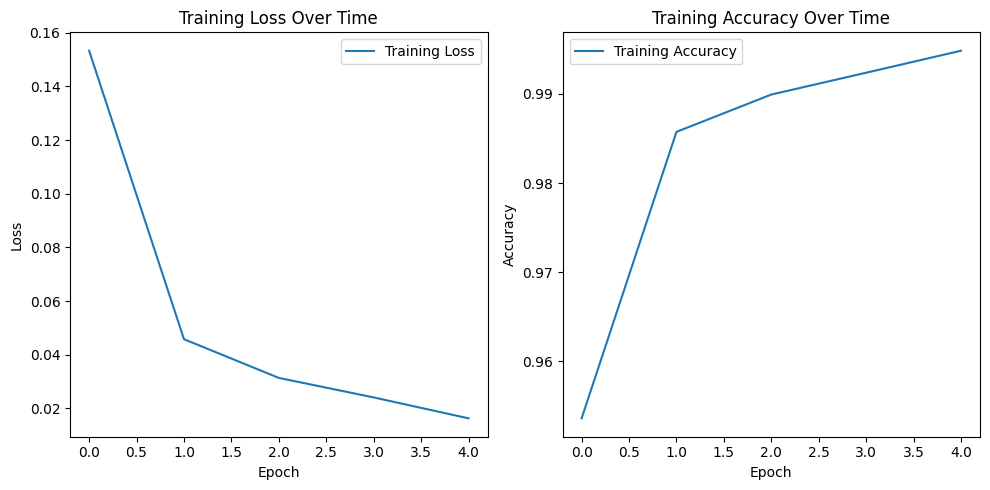

In [14]:
# Eğitim sürecini görselleştirme
"""plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.legend()

plt.tight_layout()
plt.show()"""

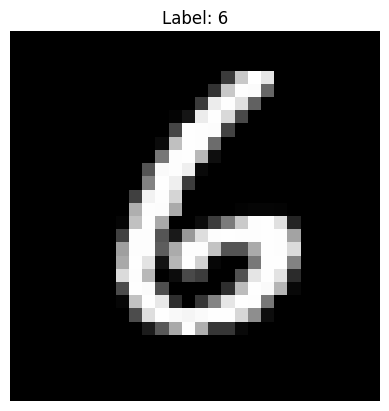

In [30]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Veri kümesini yükleme
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Rastgele bir örnek seçme
index = 6000  # Rastgele bir indeks seçin (istediğiniz indeksi verebilirsiniz)
image, label = mnist_dataset[index]

# Görüntüyü ve etiketi gösterme
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

Tahmin edilen sinif: 5


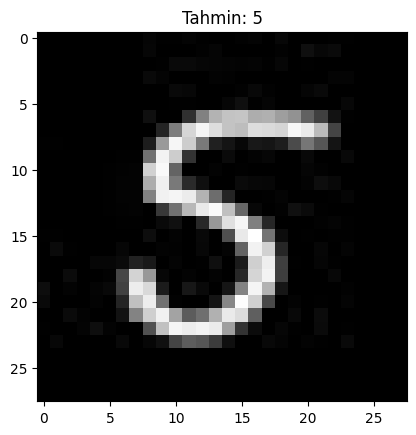

In [41]:
# Öncelikle resmi yükleyin ve uygun formata dönüştürün
image = Image.open('mnist_formatinda_resim.jpg')
transform = transforms.Compose([
    transforms.Grayscale(),  # Resmi gri tonlamaya dönüştürme
    transforms.Resize((28, 28)),  # Resmi 28x28 boyutuna yeniden boyutlandırma
    transforms.ToTensor(),  # Tensöre dönüştürme
])
image = transform(image)

# Modeldeki parametreleri dondurucu olarak ayarlayın (eğer model eğitime devam edilecekse bu adımı atlayabilirsiniz)
model.eval()

# Tahmini yapın
with torch.no_grad():
    output = model(image.unsqueeze(0))  # Girdi tensörüne örnek boyutunu ekleyin
    predicted_class = torch.argmax(output, dim=1)

# Tahmini yazdırın
print("Tahmin edilen sinif:", predicted_class.item())

# Tahmini görselleştirme (isteğe bağlı)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Tahmin: {predicted_class.item()}")
plt.show()